In [19]:
import sympy
from sympy import Symbol, factorial, exp, init_printing, diff, solve, log, simplify, limit, expand, sqrt, summation, oo, Matrix, det
init_printing()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Simple poisson distribution

Lets start by calculating it for a poisson distribution. See also https://en.wikipedia.org/wiki/Jeffreys_prior

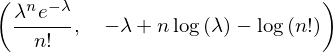

In [20]:
lam = Symbol('lambda', positive=True)
n = Symbol('n', positive=True, integer=True)

f = exp(-lam)*lam**n / factorial(n)
f, log(f).simplify()

In [21]:
d_log_f = diff(log(f), lam)
expectation_value = summation(f*d_log_f**2, (n, 0, oo))
prior = sqrt(expectation_value.simplify())
prior

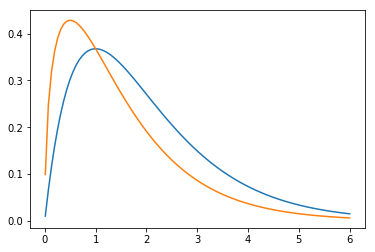

In [33]:
rate = np.linspace(0.01, 6, 100)
p = np.exp(-rate)*rate
# plt.plot(rate, 1/np.sqrt(rate))
plt.plot(rate, p)
plt.plot(rate, p/np.sqrt(rate))

Same thing just use the variables we actually have in the on region

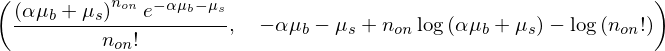

In [43]:
mu_s = Symbol('mu_s', positive=True)
mu_b = Symbol('mu_b', positive=True)
alpha = Symbol('alpha', positive=True, constant=True)
n_on = Symbol('n_on', positive=True, integer=True)

lam = mu_s + alpha*mu_b
f = exp(-lam)*lam**n_on / factorial(n_on)
f, log(f).simplify()

## Full likelihood with background expression

It is a product of poissons.

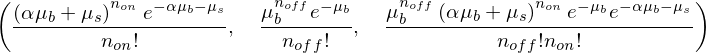

In [44]:
mu_s = Symbol('mu_s', positive=True)
mu_b = Symbol('mu_b', positive=True)
alpha = Symbol('alpha', positive=True)
n_on = Symbol('n_on', positive=True, integer=True)
n_off = Symbol('n_off', positive=True, integer=True)

lam1 = (alpha * mu_b + mu_s)
lam1
lam2 = mu_b
lam2
f1 = exp(-lam1)*lam1**n_on / factorial(n_on)
f2 = exp(-lam2)*lam2**n_off / factorial(n_off)

likelihood = f1*f2
f1, f2, likelihood

and the logarithmic likelihood

In [35]:
log(likelihood).expand().simplify()

#### Limits
To implement the function as code we have to check the limits for the parameters going to 0. Startign with n_off below

In [36]:
limit_n_off = limit(likelihood, n_off, 0, dir='+')
log(limit_n_off).expand().simplify()

Lets do the same for n_on

In [37]:
limit_n_on = limit(likelihood, n_on, 0, dir='+')
log(limit_n_on).expand().simplify()

And for both at once

In [38]:
limit_n_both = limit(limit(likelihood, n_on, 0, dir='+'), n_off, 0, dir='+')
log(limit_n_both).expand().simplify()

In [39]:
limit_mu_b = limit(likelihood, mu_b, 0, dir='+')
limit_mu_b

#### Fisher information ad Jeffreys prior

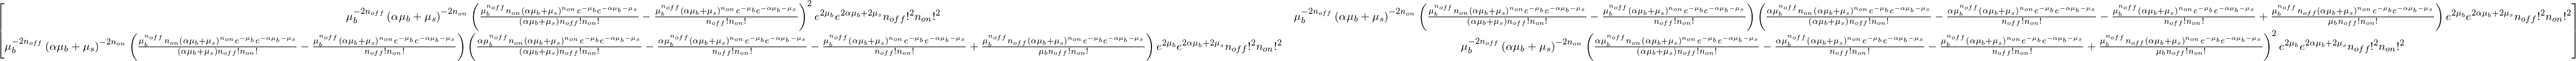

In [40]:
g = log(likelihood)
m = Matrix([[diff(g, mu_s)**2,  diff(g, mu_s) * diff(g, mu_b)], [diff(g, mu_s) * diff(g, mu_b),  diff(g, mu_b)**2]])
# m = Matrix([[ll*diff(g, mu_s)**2,  ll*diff(g, mu_s) * diff(g, mu_b)], [ll*diff(g, mu_s) * diff(g, mu_b),  ll*diff(g, mu_b)**2]])
m

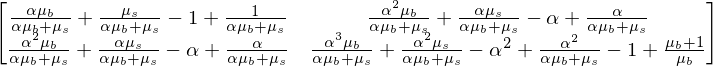

In [41]:
a = summation(likelihood*m, (n_on, 0, oo))
b = summation(a, (n_off, 0, oo))
b

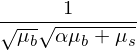

In [42]:
sqrt(b.det()).simplify()

## Weird stuff below.
Easy as pie. Now lets try for wstat. Lets do the regular likelihood first.

In [203]:
mu_s, mu_b, alpha, n_on, n_off = Symbol('mu_s', positive=True), Symbol('mu_b', positive=True), Symbol('alpha', positive=True), Symbol('n_on', positive=True, integer=True), Symbol('n_off', positive=True, integer=True) 

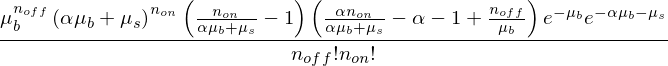

In [204]:
likelihood = ((mu_s + alpha * mu_b)**n_on)/factorial(n_on) * exp(-(mu_s + alpha*mu_b)) * ((mu_b)**n_off)/factorial(n_off) * exp(-mu_b)
log_likelihood = log(likelihood).expand().simplify()
f = likelihood * diff(log_likelihood, mu_s) * diff(log_likelihood, mu_b)
f

Lets see what the limit of the likelihood looks like for n_on and n_off to 0

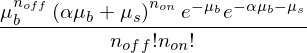

In [238]:
likelihood

In [234]:
log(limit(likelihood, n_on, 0, dir='+')).expand().simplify()

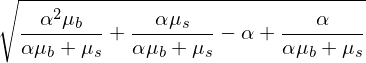

In [209]:
a = summation(f, (n_on, 0, oo))
b = summation(a, (n_off, 0, oo))
sqrt(b)

So here we go. The results look reasonable for wstat.
If it works for the complete wstat likelihood lets try for the profile.

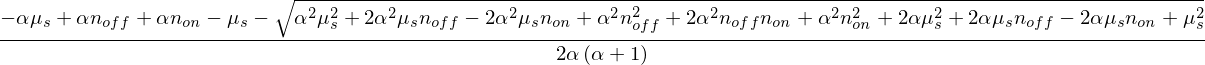

In [213]:
mu_b_of_s, _ = solve(diff(log(likelihood), mu_b), mu_b)
mu_b_of_s

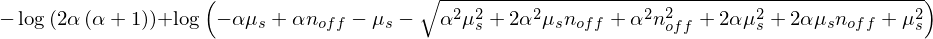

In [233]:
limit(mu_b_of_s, n_on, 0)

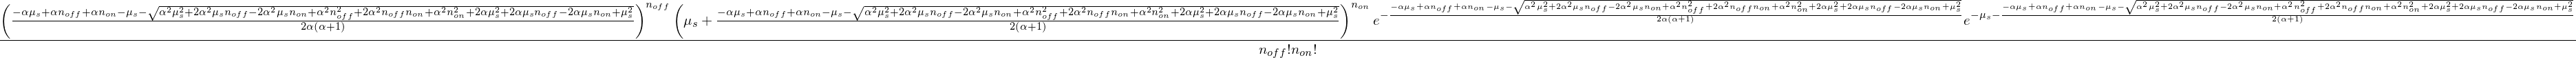

In [214]:
profile_likelihood = ((mu_s + alpha * mu_b_of_s)**n_on)/factorial(n_on) * exp(-(mu_s + alpha*mu_b_of_s)) * ((mu_b_of_s)**n_off)/factorial(n_off) * exp(-mu_b_of_s)
profile_likelihood

In [230]:
log(limit(profile_likelihood, n_on, 0, dir='-')).expand().simplify()

KeyboardInterrupt: 

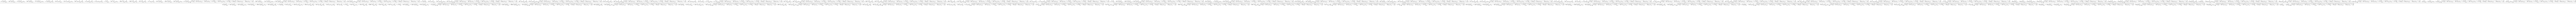

In [220]:
f = diff(log(profile_likelihood), mu_s).expand().simplify()
# limit(diff(log_profile_likelihood, mu_s), n_on, 0, dir='+')

In [224]:
a = summation(profile_likelihood * f, (n_on, 0, oo))
b = summation(a, (n_off, 0, oo))
result = sqrt(b)

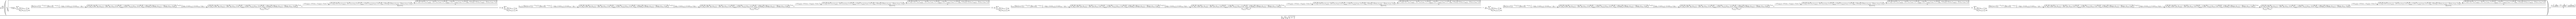

In [226]:
result.expand().simplify()